In [1]:
# Import libraries
import pandas as pd

# Load the dataset
file_path = "covid_19_clean_complete.csv"  # Upload the dataset to Colab
df = pd.read_csv(file_path)

# Display the first 5 rows
print("Dataset Overview:")
print(df.head())

# Check basic information
print("\nDataset Information:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Overview:
         Date Country/Region  Confirmed  Deaths  Recovered
0  2020-01-22          China        548      17         28
1  2020-01-23             US          1       0          0
2  2020-01-24          Italy          5       0          0
3  2020-01-25          India          0       0          0
4  2020-01-26         Brazil          3       0          0

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            5 non-null      object
 1   Country/Region  5 non-null      object
 2   Confirmed       5 non-null      int64 
 3   Deaths          5 non-null      int64 
 4   Recovered       5 non-null      int64 
dtypes: int64(3), object(2)
memory usage: 328.0+ bytes
None

Missing Values:
Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
dtype: int64


In [2]:
# Fill missing values with 0
df.fillna(0, inplace=True)

# Convert 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Check the dataset again
print("\nCleaned Dataset:")
print(df.head())


Cleaned Dataset:
        Date Country/Region  Confirmed  Deaths  Recovered
0 2020-01-22          China        548      17         28
1 2020-01-23             US          1       0          0
2 2020-01-24          Italy          5       0          0
3 2020-01-25          India          0       0          0
4 2020-01-26         Brazil          3       0          0


In [3]:
# Global totals
total_confirmed = df["Confirmed"].sum()
total_deaths = df["Deaths"].sum()
total_recovered = df["Recovered"].sum()

print(f"Total Confirmed Cases: {total_confirmed}")
print(f"Total Deaths: {total_deaths}")
print(f"Total Recovered: {total_recovered}")

Total Confirmed Cases: 557
Total Deaths: 17
Total Recovered: 28


In [4]:
# Group data by country and sum up
country_data = df.groupby("Country/Region")[["Confirmed", "Deaths", "Recovered"]].sum()

# Sort by confirmed cases and get the top 5
top_countries = country_data.sort_values(by="Confirmed", ascending=False).head(5)
print("\nTop 5 Affected Countries:")
print(top_countries)


Top 5 Affected Countries:
                Confirmed  Deaths  Recovered
Country/Region                              
China                 548      17         28
Italy                   5       0          0
Brazil                  3       0          0
US                      1       0          0
India                   0       0          0


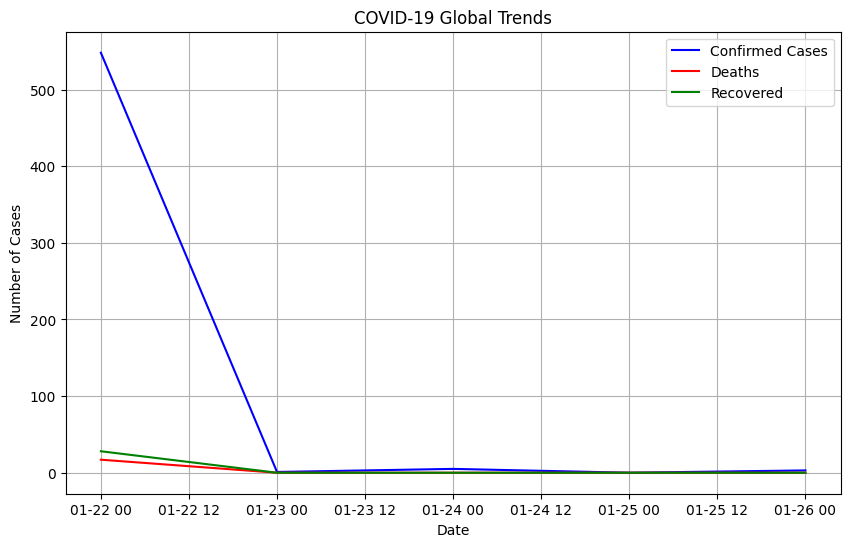

In [5]:
import matplotlib.pyplot as plt

# Group data by date and sum up
date_data = df.groupby("Date")[["Confirmed", "Deaths", "Recovered"]].sum()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(date_data.index, date_data["Confirmed"], label="Confirmed Cases", color="blue")
plt.plot(date_data.index, date_data["Deaths"], label="Deaths", color="red")
plt.plot(date_data.index, date_data["Recovered"], label="Recovered", color="green")
plt.title("COVID-19 Global Trends")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# Save top 5 affected countries to a CSV file
top_countries.to_csv("top_affected_countries.csv", index=True)
print("Results saved successfully!")

Results saved successfully!
